# Continuous matrix completion: experiments

In [1]:
from utils import *
import matplotlib.pyplot as plt

## Recovering synthetic data using standard matrix completion

### Tuning the learning rate for SGD

In [ ]:
A = syntheticA(175)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 2
p = 1/3
B = 80

In [ ]:
data = []
lr_list = [2**i for i in range(7)]

for lr in lr_list:
    I = bernoulli(A, p)
    X, Y = initial(A, r)
    data.append(optimise(X, Y, A, I, lr=lr, true_err_fn=true_err_fn, B=B, dk=1000, K=10000))
   

Best mean completion error: 0.4041849672794342
Best mean completion error: 0.40570226311683655
Best mean completion error: 3.555855698778032e-07
Best mean completion error: 1.6029683536089578e-07
Best mean completion error: 7.386243794371694e-08
Best mean completion error: 6.935552931963684e-08
Best mean completion error: 0.5533740520477295


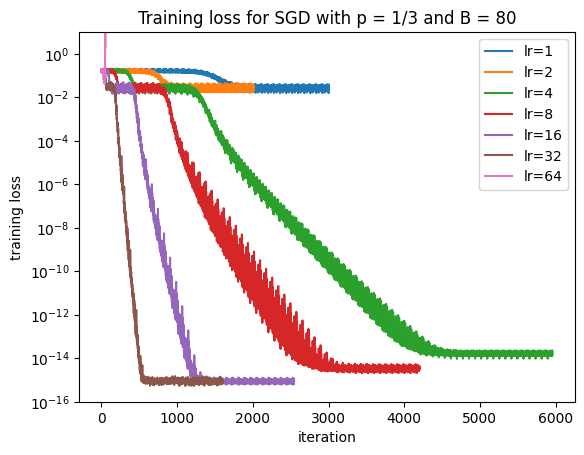

In [ ]:
for i in range(len(data)):
    plt.semilogy(data[i]["train_loss_list"], label=f"lr={2**i}")
plt.title(f"Training loss for SGD with p = 1/3 and B = {B}")
plt.xlabel("iteration")
plt.ylabel("training loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")

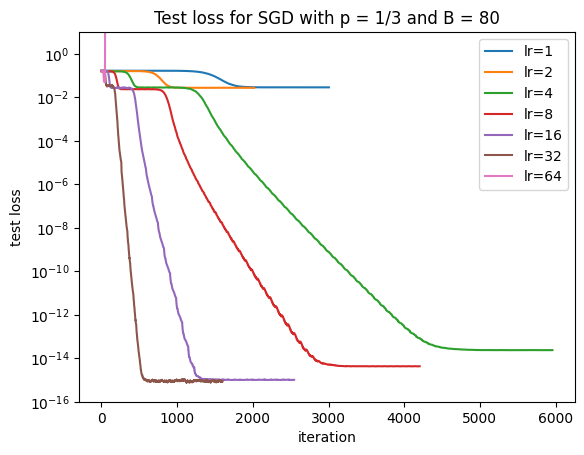

In [8]:
for i in range(len(data)):
    plt.semilogy(data[i]["test_loss_list"], label=f"lr={2**i}")
plt.title(f"Test loss for SGD with p = 1/3 and B = {B}")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")

### Comparing the test loss and mean completion error

In [3]:
A = syntheticA(175)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 2
p = 1/3
B = 80
I = bernoulli(A, p)

In [ ]:
# SGD.
X, Y = initial(A,r) 
res_sgd_syn = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 6.694961030007107e-08


In [ ]:
# Adam/
X, Y = initial(A, r)
res_adam_syn = optimise(X, Y, A, I, "adam", lr=0.01, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 2.3160885120887542e-07


In [ ]:
# ASD.
X, Y = initial(A, r)
res_asd_syn = asd(X, Y,A, I, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 1.3818731758874492e-07


(1e-16, 100.0)

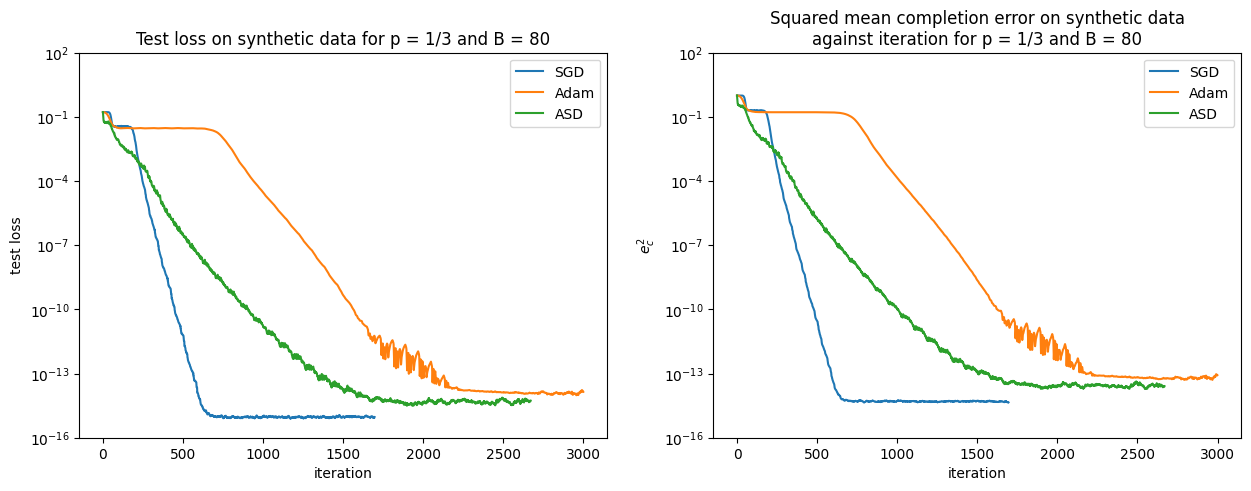

In [60]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
loss_str = "test_loss_list"
ax.semilogy(res_sgd_syn[loss_str], label="SGD")
ax.semilogy(res_adam_syn[loss_str], label="Adam")
ax.semilogy(res_asd_syn[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Test loss on synthetic data for p = 1/3 and B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")
ax.set_ylim((1e-16, 1e2))

ax = fig.add_subplot(1,2,2)
loss_str = "true_err_list"
ax.semilogy(np.array(res_sgd_syn[loss_str])**2, label="SGD")
ax.semilogy(np.array(res_adam_syn[loss_str])**2, label="Adam")
ax.semilogy(np.array(res_asd_syn[loss_str])**2, label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Squared mean completion error on synthetic data\nagainst iteration for p = 1/3 and B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel(r"$e_{c}^{2}$")
ax.set_ylim((1e-16, 1e2))

### Testing the effect of over-estimating the rank
Incomplete

In [ ]:
A = syntheticA(175)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
p = 1/3
B = 80
I = bernoulli(A, p)

In [ ]:
# SGD
adam_syn_list = []

for r in range(1,21):
    params = initial(A, r) 
    res = optimise(optimiser, params, Y, I, B, dk=1000, K=4000)
    adam_syn_list.append(res)

1171, 261, 0.40734347701072693
3039, 2833, 2.4745693849581585e-07
2339, 1535, 7.119840302038938e-05
2110, 1246, 7.03280747984536e-05
1936, 1066, 0.0001146913054981269
1812, 1046, 0.000128049825434573
1749, 945, 0.0001328494108747691
1636, 846, 0.00016734484233893454
1559, 848, 0.00024691075668670237
1541, 894, 0.00013331173977348953
1479, 824, 0.00015597825404256582
1450, 793, 0.00017435368499718606
1437, 844, 0.00027899869019165635
1388, 763, 0.0002572637749835849
1370, 844, 0.00029588324832729995
1346, 750, 0.0003423084563110024
1337, 793, 0.0004298204439692199
1322, 728, 0.00038667843909934163
1305, 744, 0.0006707497523166239
1311, 728, 0.0005350329447537661
1297, 751, 0.0007170253084041178
1269, 596, 0.0016822711331769824
1272, 644, 0.0012133383424952626
1272, 596, 0.0020406770054250956
1270, 596, 0.0023778860922902822


In [ ]:
# Rank test: rank 10 has best completion error
sgd_syn_list = []

for i in range(1, 21):
    params = initial(mu, n, i) 
    optimiser = torch.optim.SGD(params, lr=32)
    res = optimise(optimiser, params, Y, I, B, dk=500, K=4000)
    sgd_syn_list.append(res)

570, 526, 0.4476442039012909
1130, 786, 7.655641809378722e-08
983, 803, 5.208310994930798e-06
999, 846, 5.845993200637167e-06
973, 886, 7.939843271742575e-06
967, 926, 9.61437945079524e-06
959, 900, 8.876820174918976e-06
949, 919, 1.1818466191471089e-05
950, 902, 1.417226576450048e-05
949, 800, 1.5839541447348893e-05
949, 694, 1.2934911865158938e-05
949, 681, 1.341724691883428e-05
964, 696, 1.5824067304492928e-05
949, 501, 1.7839682186604477e-05
950, 895, 1.3952590052213054e-05
954, 900, 1.9054830772802234e-05
955, 896, 1.6574836990912445e-05
949, 700, 1.8831007764674723e-05
952, 899, 1.855616574175656e-05
949, 901, 2.0802559447474778e-05
949, 896, 2.1640229533659294e-05
949, 900, 2.57562605838757e-05
949, 900, 2.191594467149116e-05
949, 900, 2.2467816961579956e-05
949, 899, 2.3688440705882385e-05


In [ ]:
asd_syn_list = []

for i in range(1,21):
    U,W = initial(mu, n, i) 
    res = asd(U, W, Y, I, B, 500, K=4000)
    asd_syn_list.append(res)

514, 442, 0.5643670558929443
3999, 3972, 1.7765560755833576e-07
3999, 3971, 0.0003763399727176875
3999, 3982, 0.0035030001308768988
3999, 3922, 0.010556095279753208
2752, 2628, 0.02817692793905735
1304, 1128, 0.07353483885526657
3999, 3997, 0.03619428724050522
2775, 2677, 0.09723111987113953
3999, 3972, 0.048273324966430664
3999, 3988, 0.061924953013658524
3999, 3951, 0.06941407918930054
3999, 3940, 0.0925067588686943
3999, 3985, 0.09437298774719238
3999, 3960, 0.08385711163282394
3999, 3972, 0.1099560484290123
3999, 3986, 0.06966456770896912
2003, 1972, 0.06813684105873108
1430, 1387, 0.09638629108667374
3999, 3985, 0.08747070282697678
1492, 1472, 0.12132465839385986
3999, 3980, 0.10342413187026978
3999, 3997, 0.10134589672088623
3999, 3987, 0.10264288634061813
1413, 1386, 0.16014641523361206


In [ ]:
asd_syn_list = []

for B in [1, 10, 20, 40, 80]:
    U,W = initial(mu, n, 2) 
    res = asd_2(U, W, Y, I, B, 500, K=4000)
    asd_syn_list.append(res)

554, 112, 5.8546852699237206e-08
644, 328, 6.89789061425472e-08
784, 682, 7.469840568319341e-08
694, 536, 9.131014166996465e-08
978, 964, 1.202409833922502e-07


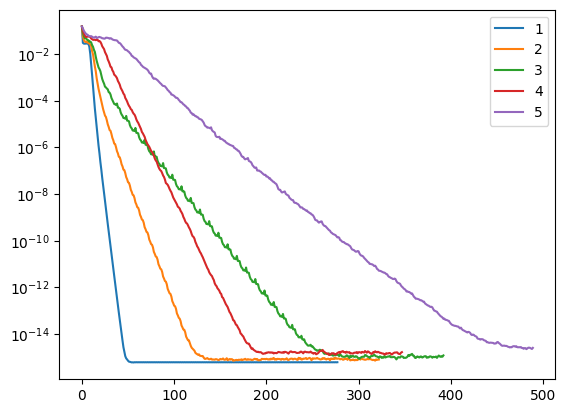

In [ ]:
for i in range(len(asd_syn_list)):
    plt.semilogy(asd_syn_list[i]["test_loss_list"], label=f"{i+1}")
plt.legend(loc="upper right")

## Recovering spectromicroscopy data using standard matrix completion

### Effects of mini-batching

In [32]:
file = np.load("CW2.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 5
p = 1/3
B = 40
K = 3000
k_test = 100
I = bernoulli(A, p)

In [40]:
# SGD with B mini-batches.
X, Y = initial(A, r) 
res_sgd_real_B = optimise(X, Y, A, I, lr=8, true_err_fn=true_err_fn, B=B, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.056430064141750336


In [ ]:
# Adam with B mini-batches.
X, Y = initial(A, r) 
res_adam_real_B = optimise(X, Y, A, I, "adam", lr=0.02, true_err_fn=true_err_fn, B=B, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.04264793545007706


In [ ]:
# Mini-batch ASD 2 with B mini-batches.
X, Y = initial(A, r) 
res_asd_real_B = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.07495799660682678


In [ ]:
# SGD without mini-batching.
X, Y = initial(A, r) 
res_sgd_real_b1 = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.04488449543714523


In [ ]:
# Adam without mini-batching.
X, Y = initial(A, r) 
res_adam_real_b1 = optimise(X, Y, A, I, "adam", lr=1, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.04293322563171387


In [ ]:
# Mini-batch ASD 2 without mini-batching.
X, Y = initial(A, r) 
res_asd_real_b1 = asd(X, Y, A, I, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.051052454859018326


Text(0, 0.5, 'test loss')

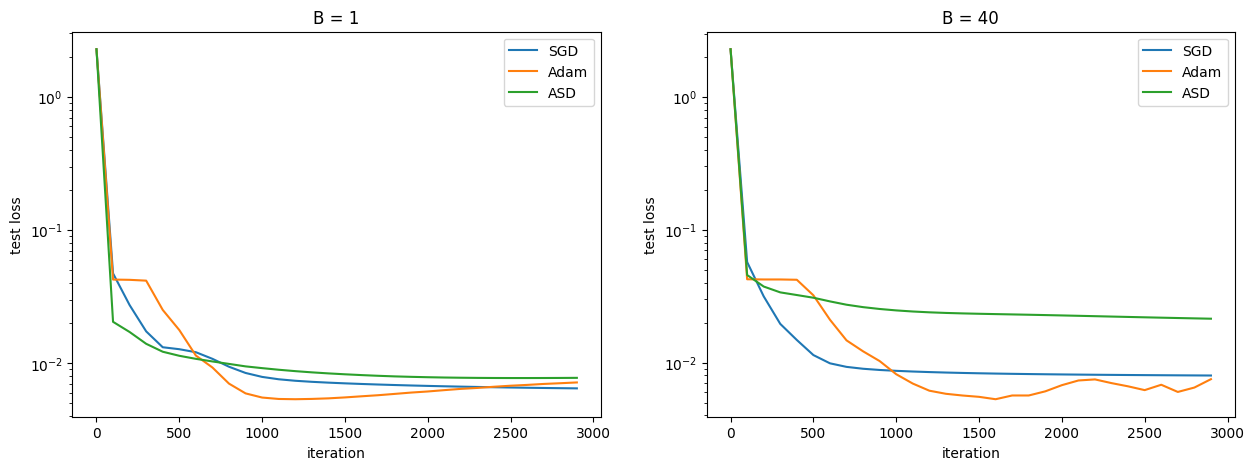

In [33]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.semilogy(np.arange(0, K, k_test), res_sgd_real_b1[loss_str], label="SGD")
ax.semilogy(np.arange(0, K, k_test), res_adam_real_b1[loss_str], label="Adam")
ax.semilogy(np.arange(0, K, k_test), res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title("B = 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
ax.semilogy(np.arange(0, K, k_test), res_sgd_real_B[loss_str], label="SGD")
ax.semilogy(np.arange(0, K, k_test), res_adam_real_B[loss_str], label="Adam")
ax.semilogy(np.arange(0, K, k_test), res_asd_real_B[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

Text(0, 0.5, 'test loss')

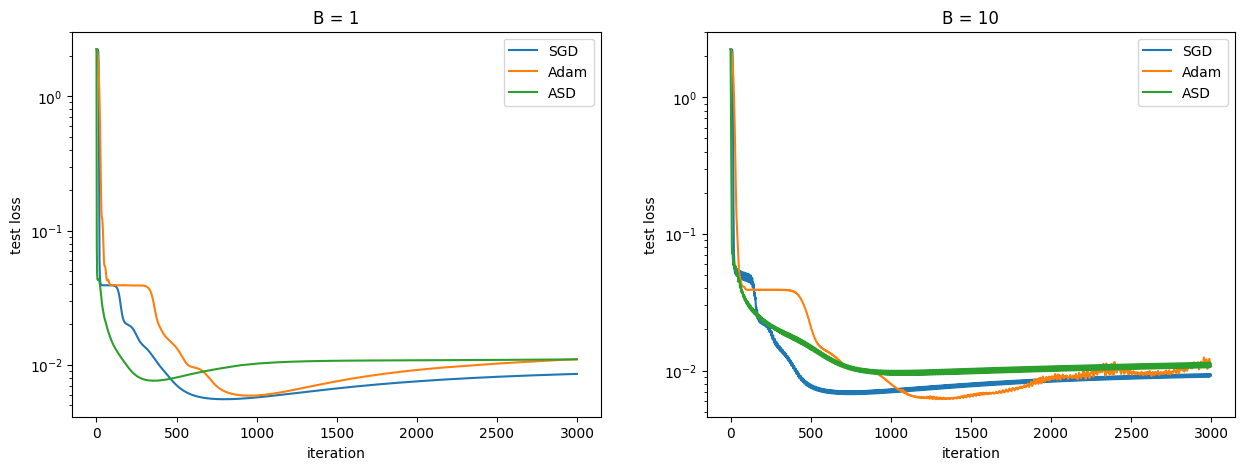

In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.semilogy(res_sgd_real_b1[loss_str], label="SGD")
ax.semilogy(res_adam_real_b1[loss_str], label="Adam")
ax.semilogy(res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
ax.semilogy(res_sgd_real_B[loss_str], label="SGD")
ax.semilogy(res_adam_real_B[loss_str], label="Adam")
ax.semilogy(res_asd_real_B[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 10")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

# fig.savefig("real_test_batch")

(-0.25, 7.25)

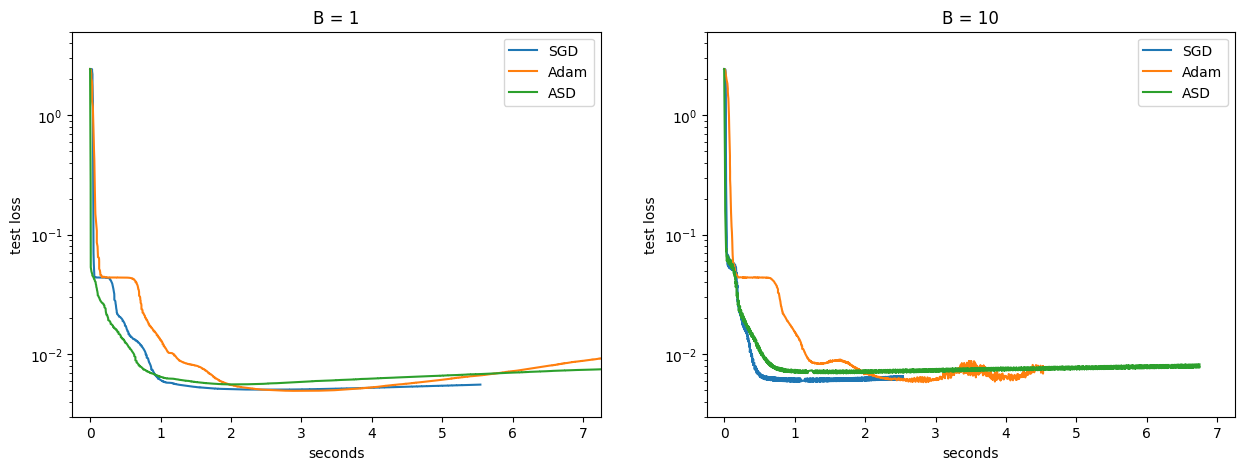

In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
ax.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
ax.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 1")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((3e-3,5))
ax.set_xlim((-0.25,7.25))

ax = fig.add_subplot(1,2,2)
ax.semilogy(np.array(res_sgd_real_b10["timestamps"]) - res_sgd_real_b10["timestamps"][0], res_sgd_real_b10[loss_str], label="SGD")
ax.semilogy(np.array(res_adam_real_b10["timestamps"]) - res_adam_real_b10["timestamps"][0], res_adam_real_b10[loss_str], label="Adam")
ax.semilogy(np.array(res_asd_real_b10["timestamps"]) - res_asd_real_b10["timestamps"][0], res_asd_real_b10[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 10")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((3e-3,5))
ax.set_xlim((-0.25,7.25))

# fig.savefig("real_test_batch_time")

(-0.25, 7.0)

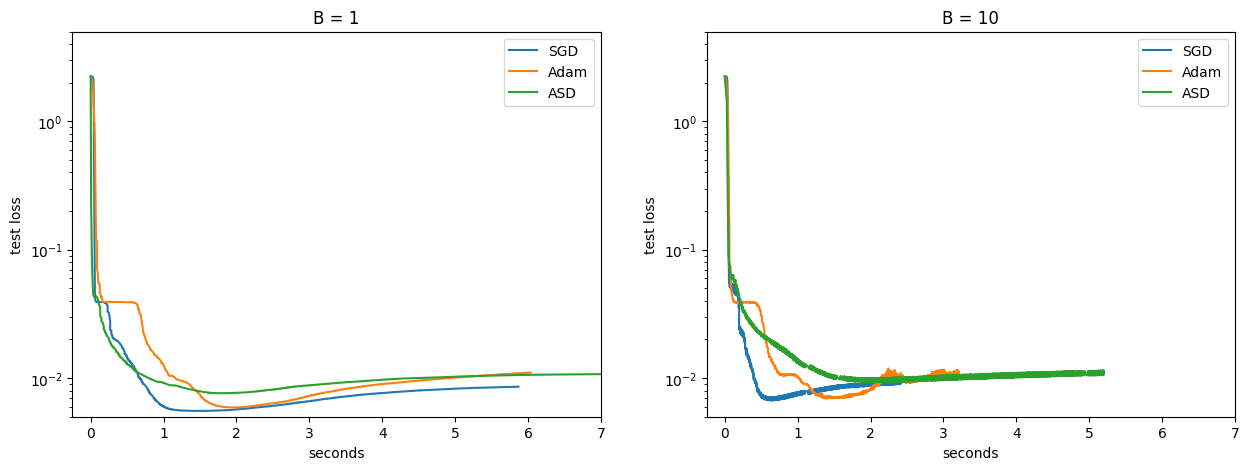

In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 1")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,7))

ax = fig.add_subplot(1,2,2)
plt.semilogy(np.array(res_sgd_real_b10["timestamps"]) - res_sgd_real_b10["timestamps"][0], res_sgd_real_b10[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b10["timestamps"]) - res_adam_real_b10["timestamps"][0], res_adam_real_b10[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b10["timestamps"]) - res_asd_real_b10["timestamps"][0], res_asd_real_b10[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 10")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,7))

# fig.savefig("real_test_batch_time")

### Adam with mini-batching

In [ ]:
K = 4000
B_list = [1, 10, 20, 40, 80]

In [45]:
# Adam.
adam_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    adam_batch_list.append(optimise(X, Y, A, I, "adam", lr=0.01, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.04168131947517395
Best mean completion error: 0.04051171615719795
Best mean completion error: 0.041334182024002075
Best mean completion error: 0.046874456107616425
Best mean completion error: 0.06864812970161438


In [ ]:
# SGD.
sgd_batch_list = []
for B in B_list:
    X, Y = initial(A, r)  
    sgd_batch_list.append(optimise(X, Y, A, I, lr=8, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.04914781451225281
Best mean completion error: 0.04940899834036827
Best mean completion error: 0.049872562289237976
Best mean completion error: 0.05201535299420357
Best mean completion error: 0.05638439953327179


In [ ]:
# Batch test
asd1_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    asd1_batch_list.append(asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.05203181132674217
Best mean completion error: 0.05405775085091591
Best mean completion error: 0.1362651139497757
Best mean completion error: 0.1794268637895584
Best mean completion error: 0.23737826943397522


In [53]:
# Mini-batch ASD 2.
asd2_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    asd2_batch_list.append(asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=K, K=K))

Best mean completion error: 0.055087294429540634
Best mean completion error: 0.056306153535842896
Best mean completion error: 0.057516250759363174
Best mean completion error: 0.061828628182411194
Best mean completion error: 0.06699679046869278


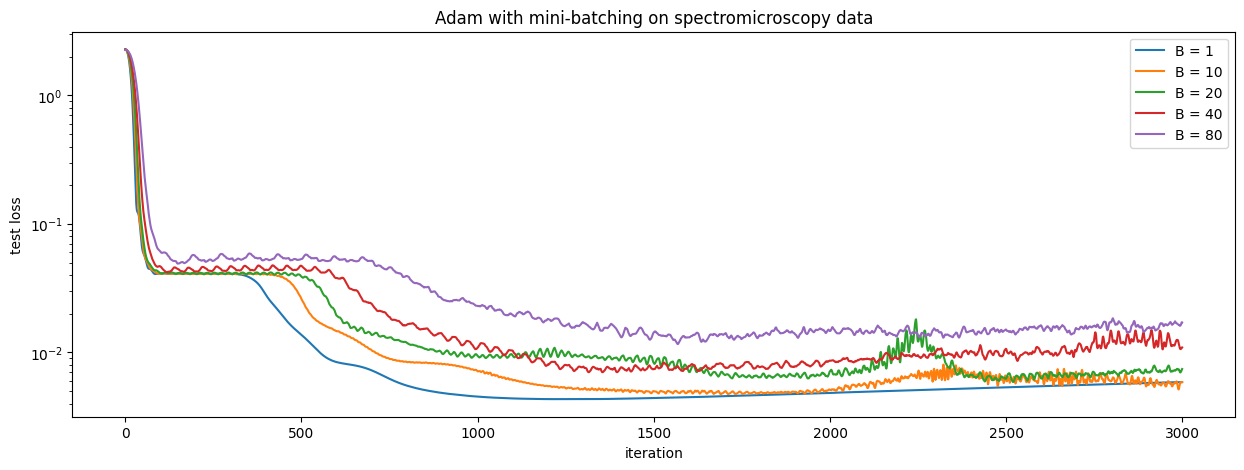

In [ ]:
loss_str = "test_loss_list"
for i in range(len(adam_batch_list)):
    plt.semilogy(adam_batch_list[i][loss_str], label=f"B = {B_list[i]}")
plt.legend(loc="upper right")
plt.title("Adam with mini-batching on spectromicroscopy data")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("real_adam_batch_test")

Text(0, 0.5, 'test loss')

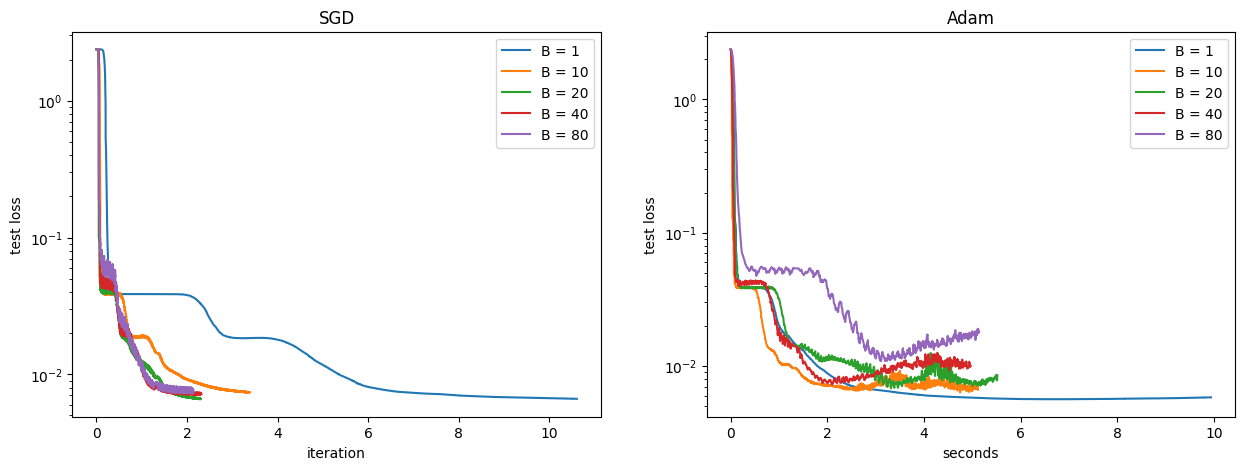

In [ ]:
plt.subplot(1,2,1)
for i in range(len(sgd_batch_test_list)):
    plt.semilogy(np.array(sgd_batch_test_list[i]["timestamps"]) - sgd_batch_test_list[i]["timestamps"][0], 
                 sgd_batch_test_list[i][loss_str], 
                 label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("SGD")
plt.xlabel("iteration")
plt.ylabel("test loss")

plt.subplot(1,2,2)
loss_str = "test_loss_list"
for i in range(len(adam_batch_test_list)):
    plt.semilogy(np.array(adam_batch_test_list[i]["timestamps"]) - adam_batch_test_list[i]["timestamps"][0], 
                 adam_batch_test_list[i][loss_str], 
                 label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("Adam")
plt.xlabel("seconds")
plt.ylabel("test loss")
# plt.savefig("real_adam_batch_test_time")

Text(0, 0.5, 'test loss')

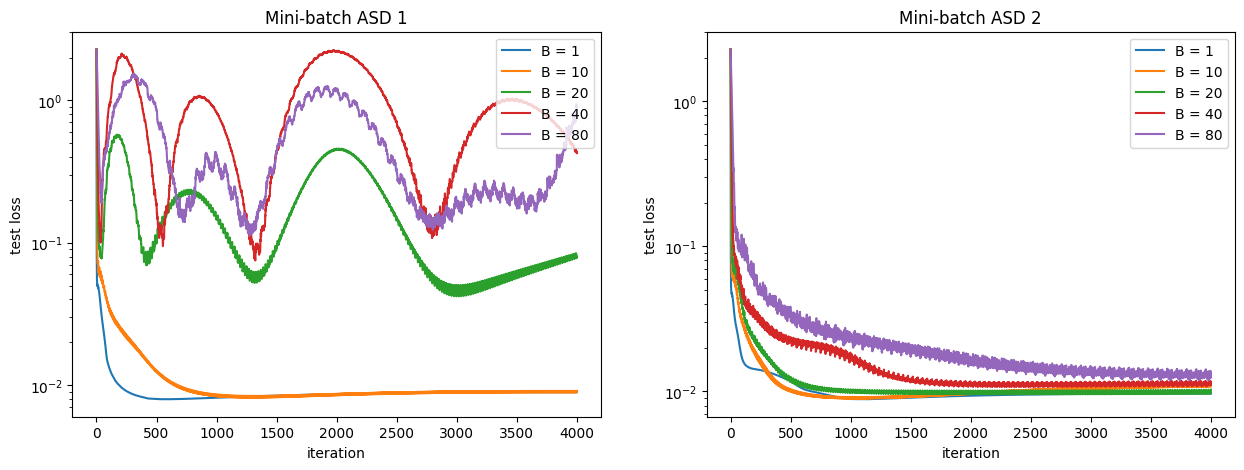

In [58]:

loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
for i in range(len(asd1_batch_list)):
    ax.semilogy(asd1_batch_list[i][loss_str], label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Mini-batch ASD 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
loss_str = "test_loss_list"
for i in range(len(asd2_batch_list)):
    ax.semilogy(asd2_batch_list[i][loss_str], label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Mini-batch ASD 2")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

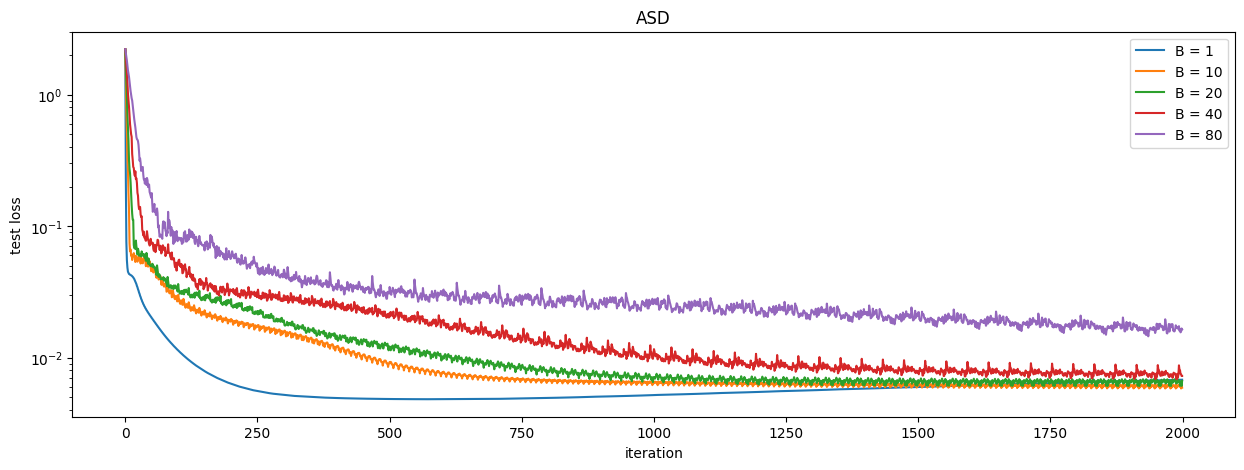

In [ ]:
loss_str = "test_loss_list"
for i in range(len(asd2_batch_test_list)):
    plt.semilogy(asd2_batch_test_list[i][loss_str], label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("ASD")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("real_asd_batch_test")

In [ ]:
# Adam real data
params = initial(mu, n, r) 
optimiser = torch.optim.Adam(params, lr=0.09)
res_adam_real = optimise(optimiser, params, Y, I, B, dk=2000, K=4000)

2196, 2122, 0.0638582706451416


In [ ]:
# SGD real data.
params = initial(mu, n, r) 
optimiser = torch.optim.SGD(params, lr=32)
res_sgd_real = optimise(optimiser, params, Y, I, B, dk=2000, K=4000)

2583, 1031, 0.042535390704870224


In [ ]:
# ASD real data.
U,W = initial(mu, n, r) 
res_asd_real = asd(U,W,Y,I,B,dk=2000,K=4000)

3279, 2143, 0.051500920206308365


Text(0, 0.5, 'test loss')

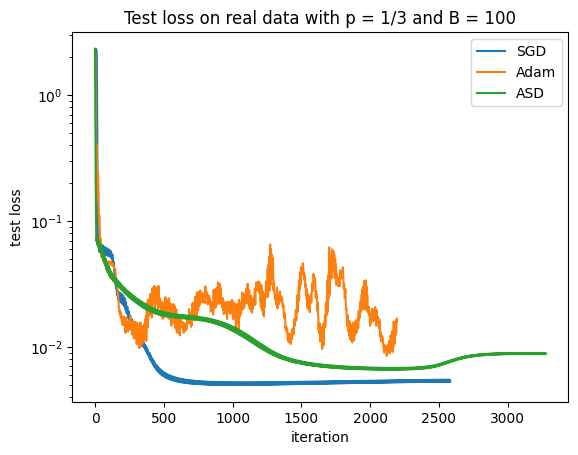

In [ ]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_real[loss_str], label="SGD")
plt.semilogy(res_adam_real[loss_str], label="Adam")
plt.semilogy(res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data with p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("test loss")
# plt.savefig("real_test_b100")

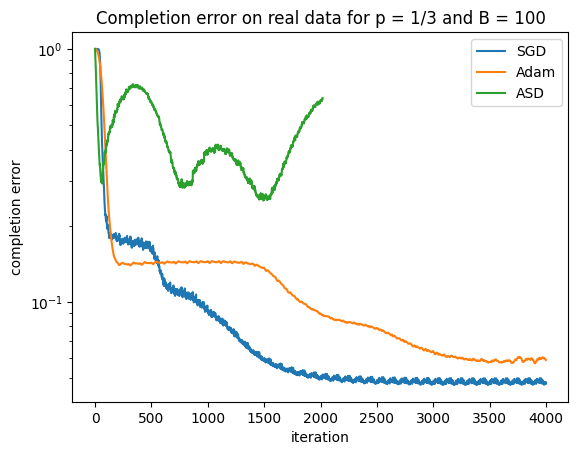

In [ ]:
loss_str = "true_err_list"
plt.semilogy(res_sgd_real[loss_str], label="SGD")
plt.semilogy(res_adam_real[loss_str], label="Adam")
plt.semilogy(res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data for p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("completion error")
plt.savefig("real_err_b100")

Text(0, 0.5, 'test loss')

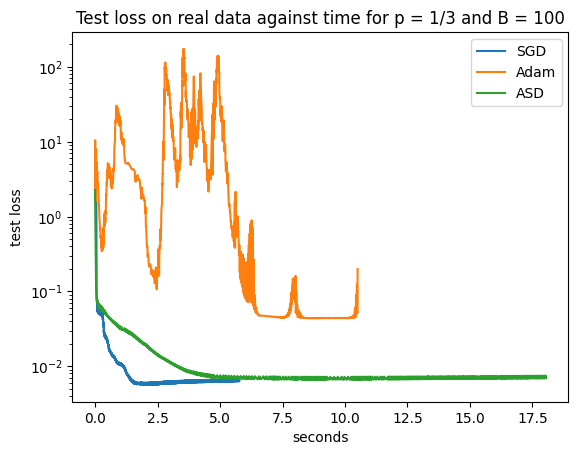

In [ ]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_real["timestamps"]) - res_sgd_real["timestamps"][0], res_sgd_real[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real["timestamps"]) - res_adam_real["timestamps"][0], res_adam_real[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real["timestamps"]) - res_asd_real["timestamps"][0], res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data against time for p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("test loss")
# plt.savefig("real_test_b100_time")

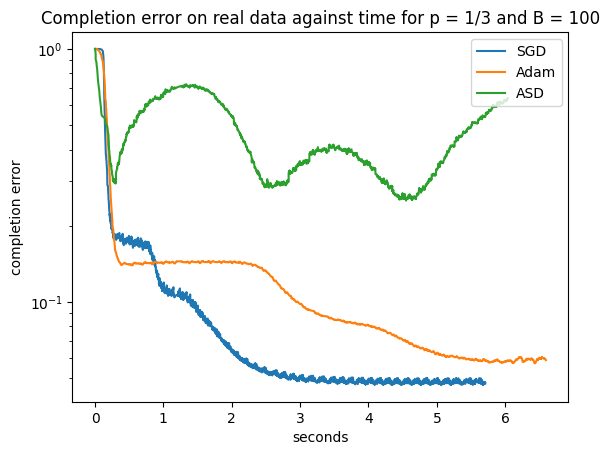

In [ ]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_real["timestamps"]) - res_sgd_real["timestamps"][0], res_sgd_real[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real["timestamps"]) - res_adam_real["timestamps"][0], res_adam_real[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real["timestamps"]) - res_asd_real["timestamps"][0], res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data against time for p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("completion error")
plt.savefig("real_err_b100_time")

In [ ]:
#1 batch real data
B = 1

In [ ]:
# Adam real data
params = initial(mu, n, r) 
optimiser = torch.optim.Adam(params, lr=0.99)
res_adam_real_b1 = optimise(optimiser, params, Y, I, B, dk=500, K=2000)

651, 277, 0.04424195736646652


In [ ]:
# SGD real data.
params = initial(mu, n, r) 
optimiser = torch.optim.SGD(params, lr=32) 
res_sgd_real_b1 = optimise(optimiser, params, Y, I, B, dk=100, K=2000)

1227, 1227, 0.04064648598432541


In [ ]:
# ASD real data.
U,W = initial(mu, n, r) 
res_asd_real_b1 = asd(U,W,Y,I,B,dk=500,K=2000)#, lr=24)

792, 447, 0.04190291091799736


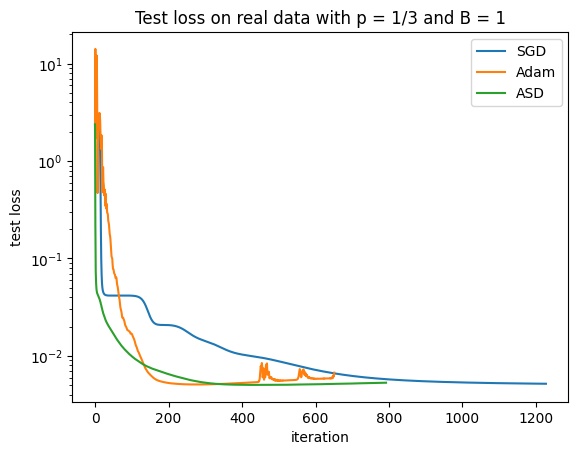

In [ ]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data with p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("real_test_b1")

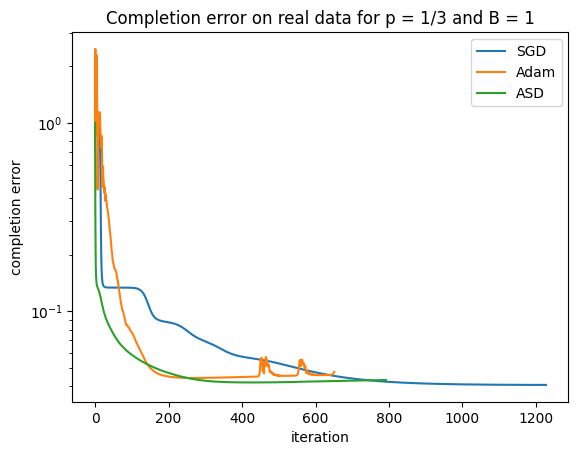

In [ ]:
loss_str = "true_err_list"
plt.semilogy(res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data for p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel("completion error")
plt.savefig("real_err_b1")

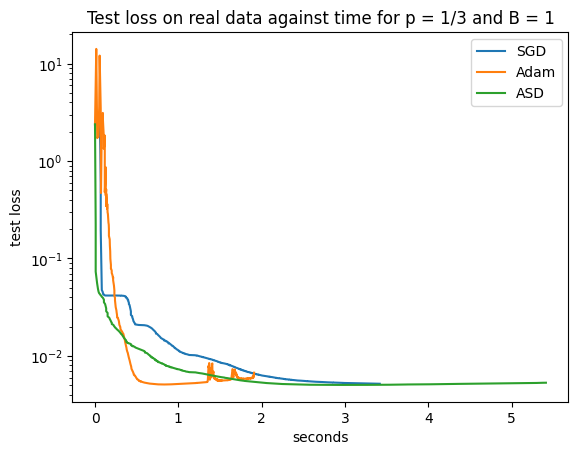

In [ ]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data against time for p = 1/3 and B = 1")
plt.xlabel("seconds")
plt.ylabel("test loss")
plt.savefig("real_test_b1_time")

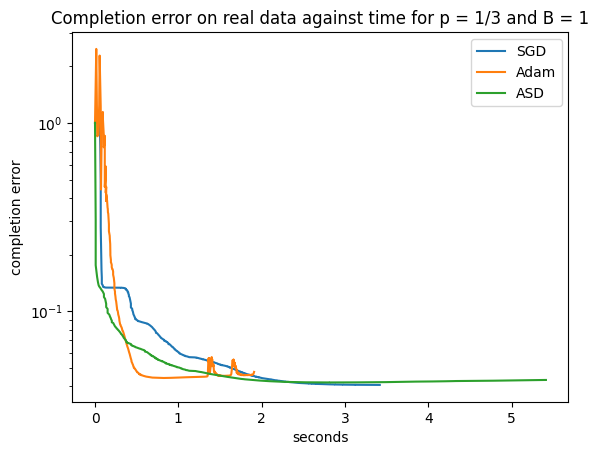

In [ ]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data against time for p = 1/3 and B = 1")
plt.xlabel("seconds")
plt.ylabel("completion error")
plt.savefig("real_err_b1_time")

In [ ]:
lim = int(I.shape[0]/(mu+n))
lim

15

In [ ]:
B = 10

In [ ]:
# Rank test: rank 5 has best completion error
adam_mean_list = []
adam_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        params = initial(mu, n, r) 
        optimiser = torch.optim.Adam(params, lr=0.02)
        res = optimise(optimiser, params, Y, I, 10, dk=1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    adam_mean_list.append(np.mean(err_list))
    adam_sd_list.append(np.std(err_list))

1
1135, 1133, 0.13369989395141602
1122, 151, 0.1334901750087738
1140, 201, 0.13465933501720428
1131, 152, 0.13491621613502502
1131, 150, 0.13435953855514526
2
2063, 2017, 0.09321632236242294
1970, 1137, 0.08918870985507965
1898, 1015, 0.08970867097377777
1836, 940, 0.09071354568004608
1790, 917, 0.09008863568305969
3
1705, 894, 0.07204263657331467
1673, 825, 0.07138174027204514
1716, 793, 0.0736759752035141
1896, 1351, 0.07429323345422745
2309, 1694, 0.07467174530029297
4
1790, 1011, 0.05904851853847504
1661, 939, 0.05789673328399658
1781, 890, 0.06138138473033905
1777, 1007, 0.0571138933300972
1853, 1049, 0.059238728135824203
5
1952, 1459, 0.03964409977197647
2125, 1724, 0.04372365400195122
1962, 1382, 0.04189474508166313
2035, 1677, 0.043265774846076965
1931, 1210, 0.041627831757068634
6
1769, 1209, 0.041477471590042114
1844, 1608, 0.03865894675254822
1871, 1272, 0.044467825442552567
1870, 1408, 0.039788972586393356
1810, 1171, 0.042076777666807175
7
2059, 1937, 0.04407186433672905
1

In [ ]:
# Rank test: rank 5 has best completion error
sgd_mean_list = []
sgd_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        params = initial(mu, n, r) 
        optimiser = torch.optim.SGD(params, lr=32)
        res = optimise(optimiser, params, Y, I, 10, dk=1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    sgd_mean_list.append(np.mean(err_list))
    sgd_sd_list.append(np.std(err_list))

1
1074, 337, 0.1413027048110962
1047, 458, 0.1423124521970749
1038, 413, 0.14352135360240936
1033, 416, 0.14196157455444336
1064, 398, 0.1433907449245453
2
1177, 223, 0.09572811424732208
1186, 268, 0.09594056010246277
1171, 199, 0.09720640629529953
1293, 974, 0.09748804569244385
1162, 178, 0.09582982212305069
3
1233, 295, 0.07319588959217072
1309, 470, 0.07399284839630127
1261, 328, 0.07624875754117966
1271, 361, 0.07497522234916687
1261, 343, 0.07380448281764984
4
1269, 397, 0.06234823167324066
1472, 744, 0.061284296214580536
1429, 1424, 0.06852664798498154
1333, 536, 0.06179554760456085
1326, 509, 0.06557095795869827
5
1685, 951, 0.0414438433945179
1635, 895, 0.04182622954249382
1463, 648, 0.04546353220939636
1580, 1034, 0.042338721454143524
1328, 437, 0.06198538839817047
6
1613, 917, 0.04308943822979927
1837, 1311, 0.04138588905334473
1829, 1339, 0.04053957387804985
1652, 949, 0.039557792246341705
2663, 2659, 0.04085979238152504
7
2215, 1717, 0.043431177735328674
1866, 1644, 0.03936

In [ ]:
# Rank test: rank 5 has best completion error
asd_mean_list = []
asd_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        U,W = initial(mu, n, r) 
        res = asd_2(U, W, Y, I, 10, 1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    asd_mean_list.append(np.mean(err_list))
    asd_sd_list.append(np.std(err_list))

1
1012, 16, 0.15687429904937744
1028, 347, 0.15297850966453552
1018, 43, 0.1539524644613266
1011, 355, 0.15121610462665558
1012, 45, 0.1517561972141266
2
1541, 1539, 0.09706148505210876
1007, 29, 0.1567658632993698
1151, 226, 0.09947195649147034
1114, 147, 0.09985954314470291
1094, 114, 0.09872034937143326
3
1125, 245, 0.08127701282501221
1149, 260, 0.08105454593896866
1697, 1136, 0.08090388774871826
1514, 775, 0.07960393279790878
1142, 227, 0.07940538227558136
4
1258, 401, 0.0664619579911232
1380, 657, 0.0659681111574173
1264, 414, 0.06565269827842712
1247, 435, 0.0654677152633667
1174, 304, 0.06551569700241089
5
1641, 952, 0.04561285302042961
1523, 733, 0.049684032797813416
1604, 1000, 0.04196175932884216
1563, 834, 0.04623110964894295
1352, 635, 0.04502936452627182
6
2101, 1594, 0.04236637428402901
2168, 1771, 0.043983981013298035
1679, 1155, 0.04495621100068092
1840, 1257, 0.05390290915966034
2999, 2994, 0.04314110428094864
7
2975, 2541, 0.04190777242183685
2999, 2998, 0.0456340499

In [ ]:
# Rank test: rank 5 has best completion error
asd1_mean_list = []
asd1_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        U,W = initial(mu, n, r) 
        res = asd_1(U, W, Y, I, 10, 1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    asd1_mean_list.append(np.mean(err_list))
    asd1_sd_list.append(np.std(err_list))

1
1014, 33, 0.15172460675239563
1016, 240, 0.14930468797683716
1018, 29, 0.1515934020280838
1017, 46, 0.15304259955883026
1015, 30, 0.14946235716342926
2
1248, 362, 0.10148947685956955
1175, 245, 0.09909479320049286
1398, 1012, 0.10382203012704849
1192, 1186, 0.09946712106466293
1193, 237, 0.10164549201726913
3
1400, 1393, 0.08219923079013824
2999, 2999, 0.08207722753286362
1566, 853, 0.08031266927719116
1183, 412, 0.10216531157493591
2999, 2999, 0.08970014750957489
4
1681, 1167, 0.0660504400730133
1503, 678, 0.12884868681430817
2570, 2053, 0.06790120899677277
1801, 1258, 0.07453519105911255
1229, 351, 0.13089483976364136
5
1511, 983, 0.06410247832536697
1855, 1303, 0.04652942344546318
2194, 1661, 0.048144929111003876
1282, 1168, 0.06923595815896988
2999, 2853, 0.05709247291088104
6
2667, 2000, 0.06520401686429977
2840, 2530, 0.09199316799640656
2999, 2990, 0.05061884596943855
2999, 2833, 0.04933486878871918
2999, 2998, 0.061337392777204514
7
2999, 2991, 0.05722370371222496
2784, 2499,

In [ ]:
asd2_mean_list = asd_mean_list
asd2_sd_list = asd_sd_list

In [ ]:
import json


data = {
    "sgd_mean_list": sgd_mean_list,
    "sgd_sd_list": sgd_sd_list,
    "adam_mean_list": adam_mean_list,
    "adam_sd_list": adam_sd_list,
    "asd1_mean_list": asd1_mean_list,
    "asd1_sd_list": asd1_sd_list,
    "asd2_mean_list": asd2_mean_list,
    "asd2_sd_list": asd2_sd_list,
}

TypeError: dump() missing 1 required positional argument: 'fp'

In [ ]:
data2 = {}
for key, res in data.items():
    res2 = []
    for val in res:
        val2 = float(val)
        res2.append(val2)
    data2[key] = res2

In [ ]:
import json


with open("data.json", "r") as file:
    data = json.load(file)

data

{'sgd_mean_list': [0.14249777793884277,
  0.09643858671188354,
  0.07444343715906143,
  0.06390513479709625,
  0.046611543744802475,
  0.04108649492263794,
  0.04094243422150612,
  0.03707015514373779,
  0.036931753158569336,
  0.03772089257836342,
  0.036531124264001846,
  0.03704381361603737,
  0.037557851523160934,
  0.03730003163218498,
  0.03555867448449135,
  0.036309272050857544,
  0.03691408783197403,
  0.03747578710317612,
  0.035428471863269806,
  0.03662104532122612,
  0.03344370424747467,
  0.03596460074186325,
  0.035262830555438995,
  0.03777065873146057,
  0.03727767989039421],
 'sgd_sd_list': [0.0008479571552015841,
  0.000750240869820118,
  0.0010686108144000173,
  0.002752324566245079,
  0.007817089557647705,
  0.0011652354151010513,
  0.0015915189869701862,
  0.0007418515742756426,
  0.0018601578194648027,
  0.0022690885234624147,
  0.000823538692202419,
  0.002962414873763919,
  0.0007719594286754727,
  0.0024871721398085356,
  0.0013578167418017983,
  0.00229239929

In [ ]:
sgd_mean_list = data["sgd_mean_list"]
sgd_sd_list = data["sgd_sd_list"]
adam_mean_list = data["adam_mean_list"]
adam_sd_list = data["adam_sd_list"]
asd2_mean_list = data["asd2_mean_list"]
asd2_sd_list = data["asd2_sd_list"]

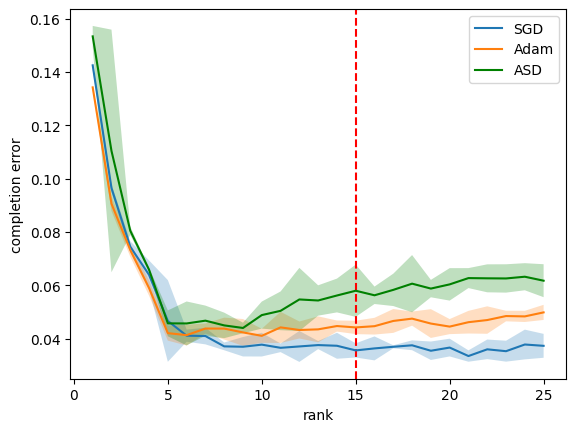

In [ ]:
# Best test loss as a function of rank.
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.axvline(x=15, ls='--', c='red')

plt.plot(np.arange(1,26),sgd_mean_list, label="SGD")
sgd_upper = np.array(sgd_mean_list) + 1.96 * np.array(sgd_sd_list)
sgd_lower = np.array(sgd_mean_list) - 1.96 * np.array(sgd_sd_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.25)

plt.plot(np.arange(1,26),adam_mean_list, label="Adam")
adam_upper = np.array(adam_mean_list) + 1.96 * np.array(adam_sd_list)
adam_lower = np.array(adam_mean_list) - 1.96 * np.array(adam_sd_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.25)

# plt.plot(np.arange(1,26),asd1_mean_list, "m", label="Mini-batch ASD 1")
# asd_upper = np.array(asd1_mean_list) + 1.96 * np.array(asd1_sd_list)
# asd_lower = np.array(asd1_mean_list) - 1.96 * np.array(asd1_sd_list)
# plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="m", alpha=0.25)

plt.plot(np.arange(1,26),asd2_mean_list, "g", label="ASD")
asd_upper = np.array(asd2_mean_list) + 1.96 * np.array(asd2_sd_list)
asd_lower = np.array(asd2_mean_list) - 1.96 * np.array(asd2_sd_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="g", alpha=0.25)

# data = []
# for res in sgd_list:
#     data.append(res["test_loss_list"][res["best_iter"]])
# plt.plot(np.arange(1,26),np.array(data), label="SGD")

plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
plt.savefig("real_rank_test_b10")

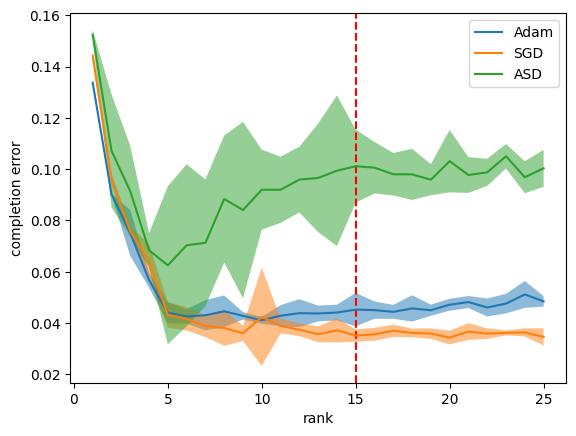

In [ ]:
# Best test loss as a function of rank.
plt.axvline(x=15, ls='--', c='red')

plt.plot(np.arange(1,26),adam_mean_list, label="Adam")
adam_upper = np.array(adam_mean_list) + 1.96 * np.array(adam_sd_list)
adam_lower = np.array(adam_mean_list) - 1.96 * np.array(adam_sd_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.5)

plt.plot(np.arange(1,26),sgd_mean_list, label="SGD")
sgd_upper = np.array(sgd_mean_list) + 1.96 * np.array(sgd_sd_list)
sgd_lower = np.array(sgd_mean_list) - 1.96 * np.array(sgd_sd_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.5)

plt.plot(np.arange(1,26),asd_mean_list, label="ASD")
asd_upper = np.array(asd_mean_list) + 1.96 * np.array(asd_sd_list)
asd_lower = np.array(asd_mean_list) - 1.96 * np.array(asd_sd_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, alpha=0.5)

# data = []
# for res in sgd_list:
#     data.append(res["test_loss_list"][res["best_iter"]])
# plt.plot(np.arange(1,26),np.array(data), label="SGD")

plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
# plt.savefig("real_rank_test_b10")

## Recovering synthetic data using continuous matrix completion

In [ ]:
A = syntheticA(175)  
p = 1/3
B = 10
mu, n = Y.shape
I = bernoulli(mu, n, p)
# I is a M x 2 tensor of index pairs generated by bernoulli or whatever
X = I + torch.rand(len(I), 2)
# Function on the jittered positions will make the observed data
# Try to recover the matrix from the original positions I though!
F = syntheticf(X/n)

In [7]:
# SGD synthetic continuous using jittered I
params = initial(mu, n, 2) 
optimiser = torch.optim.SGD(params, lr=16)
res_sgd_syn_cX = optimise_f(optimiser, params, F, X, Y, B, dk=2500, K=2500)

2499, 2489, 1.1141278264403809e-05


In [8]:
# SGD synthetic continuous with I
params = initial(mu, n, 2) 
optimiser = torch.optim.SGD(params, lr=16)
res_sgd_syn_cI = optimise_f(optimiser, params, F, I, Y, B, dk=2500, K=2500)

2499, 1018, 0.008568833582103252


In [9]:
# Adam synthetic continuous using I
params = initial(mu, n, 2) 
optimiser = torch.optim.Adam(params, lr=0.01)
res_adam_syn_cI = optimise_f(optimiser, params, F, I, Y, B, dk=2500, K=2500)

2499, 568, 0.008580191060900688


In [10]:
# Adam synthetic continuous with jittered I
params = initial(mu, n, 2) 
optimiser = torch.optim.Adam(params, lr=0.01)
res_adam_syn_cX = optimise_f(optimiser, params, F, X, Y, B, dk=2500, K=2500)

2499, 2153, 1.1157485459989402e-05


In [11]:
# ASD synthetic with I.
U,W = initial(mu, n, 2) 
res_asd_syn_cI = asd_f(U,W,F,Y,I,B,dk=2500,K=2500)

2499, 2491, 0.008884085342288017


In [12]:
# ASD synthetic with X.
U,W = initial(mu, n, 2) 
res_asd_syn_cX = asd_f(U,W,F,Y,X,B,dk=2000,K=2000)

1999, 159, 1.1486109542602208e-05


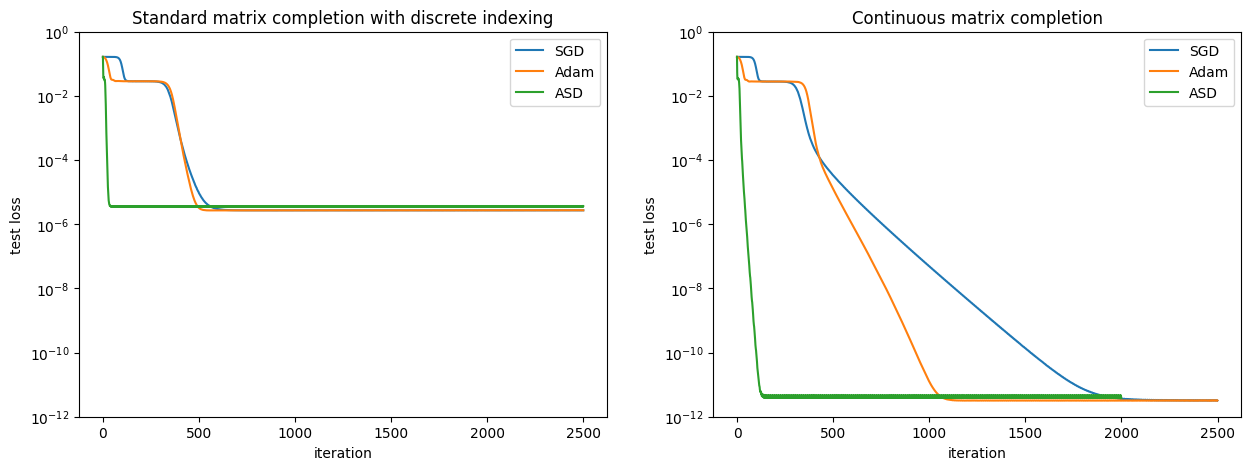

In [14]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cI[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Standard matrix completion with discrete indexing")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")
ax.set_ylim((1e-12, 1))

ax = fig.add_subplot(1,2,2)
plt.semilogy(res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cX[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Continuous matrix completion")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")
ax.set_ylim((1e-12, 1))

fig.savefig("syn_cont_test")

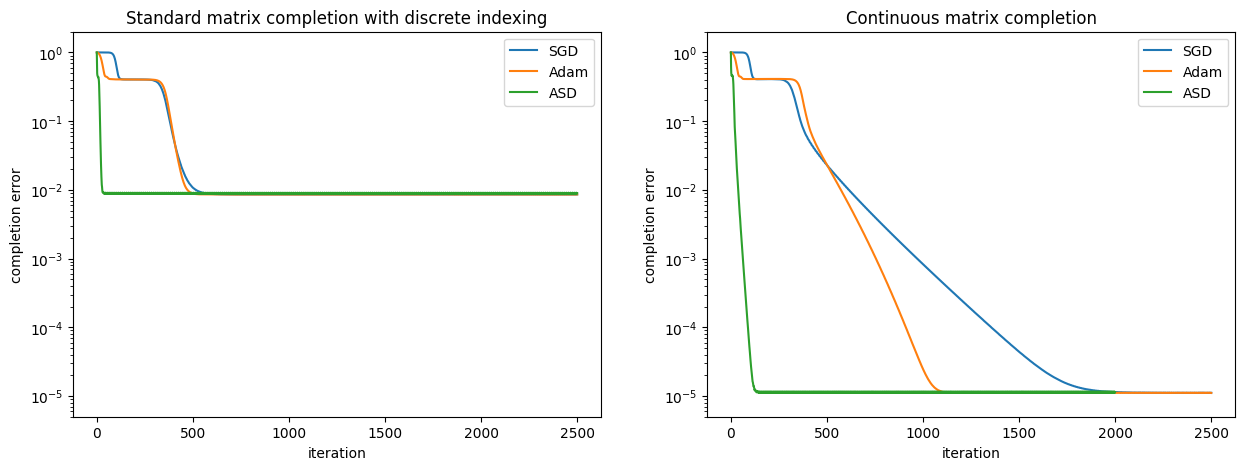

In [15]:
loss_str = "true_err_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cI[loss_str], label="ASD")
ax.set_title(f"Standard matrix completion with discrete indexing")
ax.legend(loc="upper right")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))

ax = fig.add_subplot(1,2,2)
plt.semilogy(res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cX[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Continuous matrix completion")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))

fig.savefig("syn_cont_err")